## Initialisation

In [1]:
import os

import numpy as np
import pandas as pd

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\ode-biomarker-project


In [2]:
# Bring in CCLE data
from PathLoader import PathLoader
from DataLink import DataLink
path_loader = PathLoader('data_config.env', 'current_user.env')
data_link = DataLink(path_loader, 'data_codes.csv')

In [3]:
# attempt load from loading code

# fgfr4_model_raw_simulation
# cdk_model_downsampled_simulation

loading_code = 'fgfr4_model_raw_simulation'
simulation_data = data_link.get_data_from_code(loading_code)
plot_test = False
max_to_plot = -1

## Plotting

In [4]:
simulation_data

,Cellline,Time,pIGFR,pFGFR4,pERBB,pIRS,aPI3K,PIP3,pFRS2,aGrb2,...,pMEK,pERK,aGAB1,aGAB2,SPRY2,pSPRY2,PTP,aCbl,FOXO,amTORC2
0,ACH-001113,0,0.004584,133.063698,30.041304,0.008239,0.711660,0.026866,0.072482,1.762771,...,0.039595,434.690222,3.511815,5.665967e-11,1.286341,1.633151e-05,12.094080,4.013742,142.223071,0.035257
1,ACH-001113,60,0.006161,0.707059,39.850969,0.008820,0.032865,0.001236,0.000389,0.971944,...,0.001151,15.624283,0.113390,9.005249e-10,8.647812,5.886911e-07,8.997799,4.020537,171.210063,0.035257
2,ACH-001113,120,0.009543,0.978536,59.249121,0.009739,0.489603,0.018473,0.000537,1.444383,...,0.004874,64.992899,2.119397,3.140406e-10,15.677962,1.475912e-06,5.807274,4.030926,184.264175,0.035376
3,ACH-001113,180,0.011310,1.096258,68.814101,0.010853,0.672549,0.025385,0.000602,1.677192,...,0.004177,55.951646,3.238889,4.195981e-10,22.294951,2.351654e-06,4.898984,4.044253,178.354613,0.035659
4,ACH-001113,240,0.012745,1.181330,76.305021,0.012089,0.784335,0.029606,0.000649,1.859451,...,0.003584,48.188283,4.055861,5.370477e-10,28.509268,3.240881e-06,4.346681,4.059094,167.608802,0.036007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35095,ACH-000052,1200,0.049248,1.880391,138.650385,0.105497,16.697973,0.630293,0.000829,3.100799,...,0.000528,7.727831,27.141942,1.291626e-08,84.758057,1.231497e-05,0.770462,5.088860,9.824946,0.523766
35096,ACH-000052,1260,0.050298,1.876532,140.159651,0.110402,16.704313,0.630532,0.000828,3.134400,...,0.000517,7.566772,27.187355,1.332593e-08,86.538262,1.254786e-05,0.754276,5.125351,9.810677,0.528856
35097,ACH-000052,1320,0.051284,1.872069,141.548801,0.115091,16.710030,0.630748,0.000826,3.165321,...,0.000507,7.420166,27.228411,1.371511e-08,88.215995,1.276073e-05,0.739682,5.161324,9.796681,0.533944
35098,ACH-000052,1380,0.052211,1.867138,142.832245,0.119569,16.715218,0.630944,0.000824,3.193884,...,0.000497,7.286105,27.265736,1.408519e-08,89.799967,1.295566e-05,0.726451,5.196746,9.782923,0.539031


In [5]:
all_species = simulation_data.columns[2:]
all_celllines = simulation_data['Cellline'].unique()

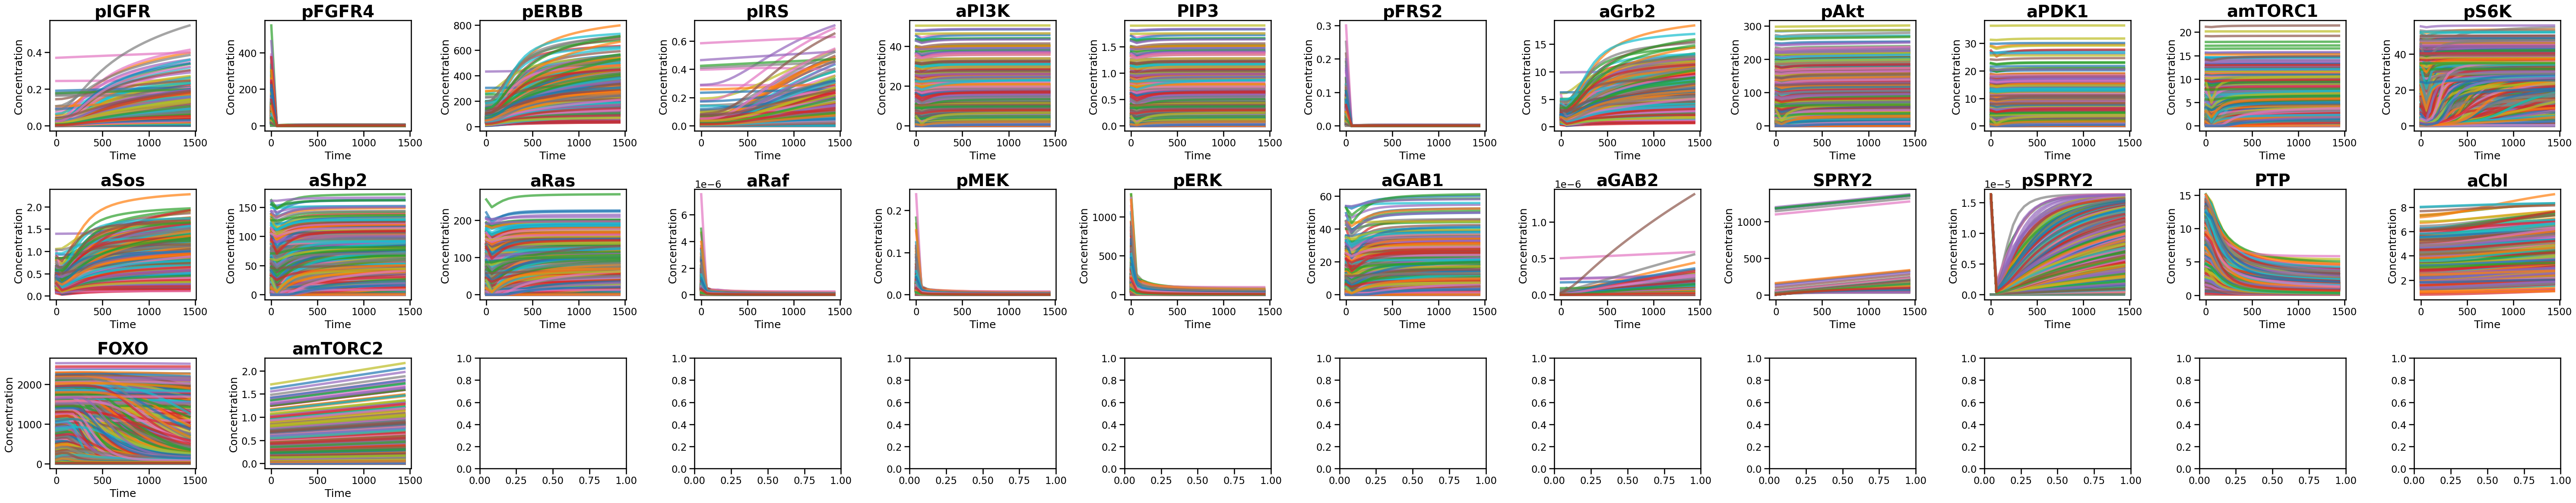

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

import math

plot_cols = 12
plot_rows = math.ceil(len(all_species)/plot_cols)
sns.set_context('talk')
# sns.set_style('whitegrid')
plt.subplots(plot_rows, plot_cols, figsize=(5*plot_cols, 4*plot_rows))

# plot each species for each cell line, each specie as a subplot
for i, specie in enumerate(all_species):
    plt.subplot(plot_rows, plot_cols, i+1)
    celllines_to_plot = all_celllines[:5] if plot_test else all_celllines
    if max_to_plot != -1:
        celllines_to_plot = all_celllines[:max_to_plot]
    for cellline in celllines_to_plot:
        cellline_data = simulation_data[simulation_data['Cellline'] == cellline]
        plt.plot(cellline_data['Time'], cellline_data[specie], linewidth=4, alpha=0.7)
    plt.title(specie, fontsize=28, fontweight='bold')
    plt.xlabel('Time')
    plt.ylabel('Concentration')

plt.tight_layout()
plt.show()